In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import lognorm

In [9]:
sample1 = [4.77,   9.58,  11.44,  7.65, 17.83,  8.1,   2.49, 12.65,  6.9,  2.46, 
           9.53,  14.45,  16.79,  3.3,   8.06,  3.67, 11.83, 13.28, 17.54,  5.9,
          18.32,   3.12,  2.58,  1.51, 18.87,  5.68,  4.36,  7.16,  3.74, 13.23,
          15.66,  14.29,   4.96, 16.94,  1.82,  7.07,  3.39, 15.13, 15.36, 18.52,
          10.48,   3.43,  12.99, 19.37,  4.42,  4.86,  8.24, 18.46,  3.81,  1.55, 
           5.95,   4.39,   8.2,   5.31,  4.44,  3.69,  8.08,  6.63,  3.5,   7.08,
          18.58,   9.92,   6.75,  9.63, 12.53,  4.57,  5.29,  6.23,  6.19,  8.88,
           3.7,    7.78,   2.5,   4.12,  7.32,  6.6,  10.14, 25.94,  4.63, 21.1, 
           5.65,   7.73,  14.62,  7.64, 20.02,  5.11,  5.98,  5.85,  4.9,  11.67,
           9.57,   3.53,  18.32,  3.5,  16.27, 16.14,  8.14,  6.95,  6.09,  8.71]
print(np.array(sample1).mean())

8.936000000000002


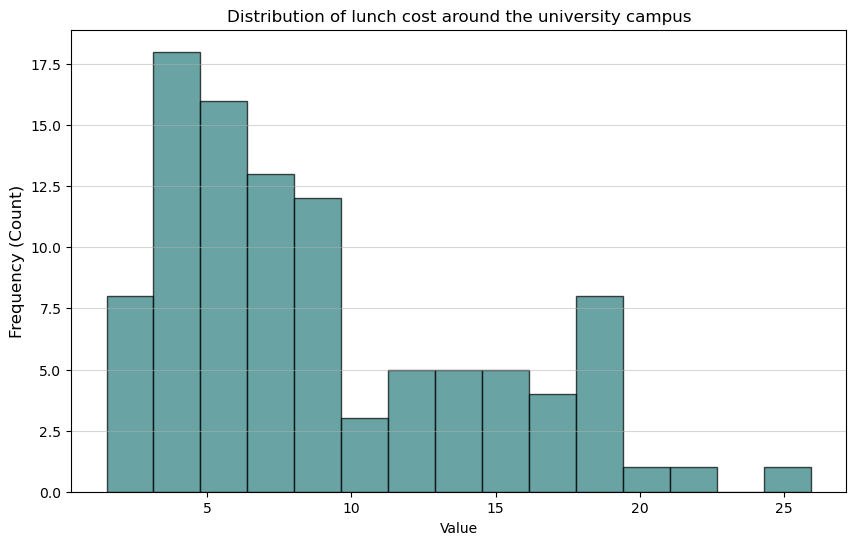

In [7]:
# Set up the plot area
plt.figure(figsize = (10, 6))

# Create the histogram
plt.hist(
    sample1,
    bins = 15, # 15 bins is a good starting point for 100 datapoints
    edgecolor = 'black', # drawslines between the bars
    alpha = 0.7,
    color = '#2a7d7d'
)

# Add titles and labels for clarity
plt.title('Distribution of lunch cost around the university campus')
plt.xlabel('Value', fontsize = 10)
plt.ylabel('Frequency (Count)', fontsize = 12)
plt.grid(axis = 'y', alpha = 0.5)

# save and/or display the plot
plt.savefig('histogram_sample1.png')
plt.show()

In [8]:
# --- 1. Convert list to a NumPy array for calculation ---
data = np.array(sample1)

# --- 2. Fit the log-normal distribution ---
# lognorm.fit returns(shape, loc, scale)
# the standard log-normal assumes the location (loc) parameter is 0.
# so we force it to 0 using floc = 0
# In Scipy's parametrization:
# shape(x) is the sigma of the log-transformed data (G_log)
# scale is exp(mu_log)

# Perform the Maximum Likelihood Estimation (MLE) fit
shape_fit, loc_fit, scale_fit= lognorm.fit(data, floc = 0)

# --- 3. Extract the Requested Parameters (mu_log and sigma_log) --- 

#   The estimated sigma (standard deviation of the log-transformed data) is SciPy's 'shape'
estimated_sigma_log = shape_fit

#   The estimated mu (mean of the log_transformed data) is the natural log of SciPy's 'scale'
estimated_mu_log = np.log(scale_fit)

#  --4. Output results ---
print("--- Log-Normal Distribution Fit Results (MLE) ---")
print(f"Data Points (N): {len(data)}")
print(f"Sample Mean (Raw Data): {np.mean(data):.4f}")
print("=" * 40)
print("Fitted Parameters for the Underlying Normal Distribution:")
print(f"Estimated MU (mean of log-data, mu_log): {estimated_mu_log:.4f}")
print(f"Estimated SIGMA (stdev of log-data, sigma_log): {estimated_sigma_log:.4f}")
print(f"Location (loc_fit): {loc_fit:.4f} (Forced to 0)")
print("=" * 40)

# The parameters of the resulting log-normal distribution 
print("Scipy's Fitted Parameters (for log-normal.pdf):")
print(f"Shape (s): {shape_fit:.4f}")
print(f"Scale (exp(u)): {scale_fit:.4f}")



--- Log-Normal Distribution Fit Results (MLE) ---
Data Points (N): 100
Sample Mean (Raw Data): 8.9360
Fitted Parameters for the Underlying Normal Distribution:
Estimated MU (mean of log-data, mu_log): 1.9962
Estimated SIGMA (stdev of log-data, sigma_log): 0.6421
Location (loc_fit): 0.0000 (Forced to 0)
Scipy's Fitted Parameters (for log-normal.pdf):
Shape (s): 0.6421
Scale (exp(u)): 7.3613


In [28]:
# CI using the Central Limit Theorem (CLT)
sample_size = len(sample1)
sample_mean = 8.94
sample_standard_deviation = np.sqrt(sum((data - sample_mean)**2)/(len(data)-1))

# 95% CI
zscore = 1.96
standard_error_of_the_Mean = sample_standard_deviation/np.sqrt(sample_size)
lb = sample_mean - 1.96 * zscore * standard_error_of_the_Mean
ub = sample_mean + 1.96 * zscore * standard_error_of_the_Mean

print(f"A 95% confidence interval for the population mean is given by the interval [{lb:.2f},{ub:.2f}]")

A 95% confidence interval for the population mean is given by the interval [6.83,11.05]
